C:\Users\user\.conda\envs\ipykernel_py2\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


innitiating the data input...

Initialing filter function
innitiang filter Bandpass
[ 0.          0.          0.         ...  0.13788165 -0.02722527
 -0.02647435]


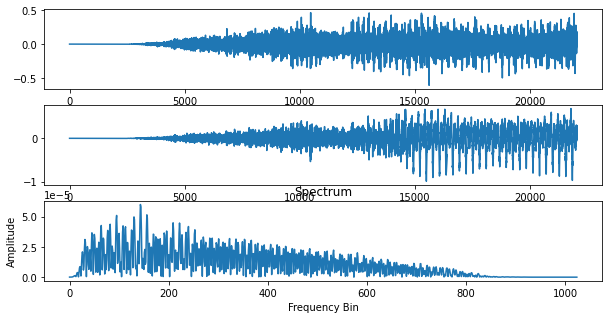

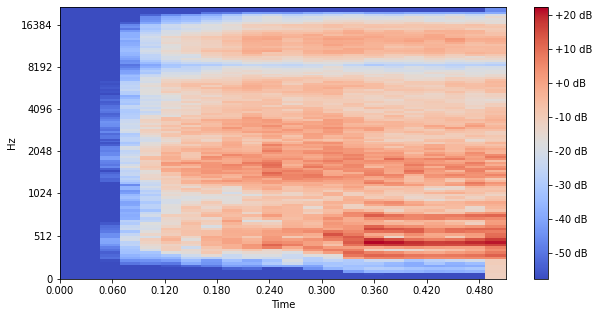

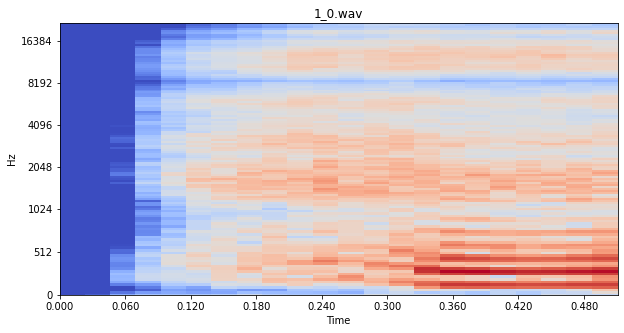

Initialing filter function
innitiang filter Bandpass
[0.06036533 0.197112   0.18479706 ... 0.01423197 0.01440201 0.01072049]


<Figure size 432x288 with 0 Axes>

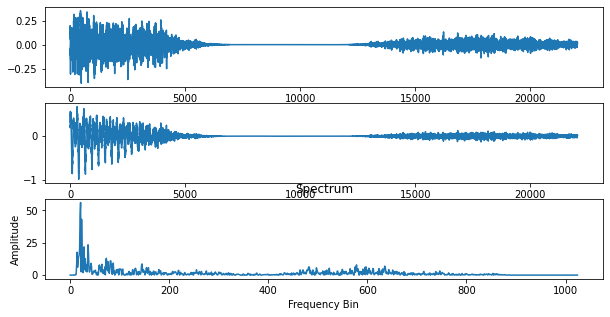

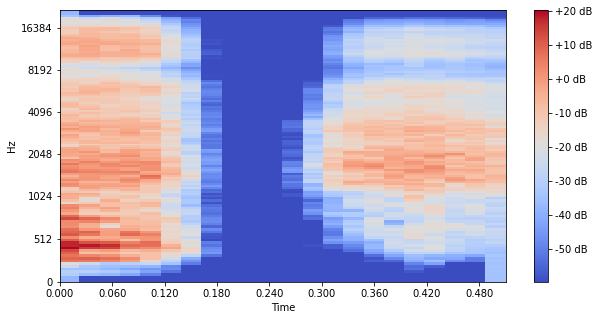

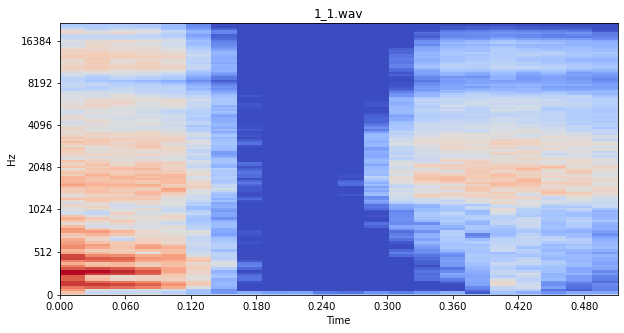

<Figure size 432x288 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import IPython
import IPython.display as ipd
import time
import wave
from scipy.signal import butter, sosfilt, sosfreqz
from scipy import signal
import librosa
import librosa.display
from pydub import AudioSegment, effects  
from scipy.fft import fftshift

#Filter is broken

class Training(object): 
    def __init__(self):
        print("innitiating the data input...\n")
       ##https://stackoverflow.com/questions/12093594/how-to-implement-band-pass-butterworth-filter-with-scipy-signal-butter
#     def butter_bandpass(self,lowcut, highcut, fs, order=6):
#         nyq = 0.5 * fs
#         low = lowcut / nyq
#         high = highcut / nyq
#         sos = butter(order, [low, high], analog=False, btype='band', output='sos')
#         return sos

#     def Filter(self,data, lowcut, highcut, fs, order=6):
#         sos = self.butter_bandpass(lowcut, highcut, fs, order=order)
#         y = sosfilt(sos,data)
#         return y

    def Input(self,i):
        print("Initialing filter function") 
        lowcut= 100.0
        highcut= 4000.0
        hop_length = 1024
        self.File_name= f"1_{i}.wav"
        y, sr= librosa.load('./archive/Output_Snoring/' + self.File_name )
        Img= self.Filter(y, lowcut, highcut,fs=10000.0)
    #initiang filter 
        PictureName = f"{i}.jpeg"
        print("innitiang filter Bandpass")
        fig,(ax2, ax1,ax3) = plt.subplots(3, figsize=(10,5))
        ax2.plot(Img)
        ax1.plot(y )
        

        n_fft=2048
        hop_length = 1024
        sr = 44100
        ###########################################################################################
        ft = np.abs(librosa.stft(Img[:n_fft], hop_length = n_fft+1))
        ax3.plot(ft)
        plt.title('Spectrum')
        plt.xlabel('Frequency Bin')
        plt.ylabel('Amplitude')
        
        #Librosa for mel Spectogram
        mel_spectrogram = librosa.feature.melspectrogram(Img, sr=sr, n_fft=n_fft, hop_length=hop_length)
        fig,(ax1) = plt.subplots(1, figsize=(10,5))
        Spec= librosa.power_to_db(mel_spectrogram)
        img = librosa.display.specshow(Spec,sr=sr,hop_length=hop_length,x_axis='time', y_axis='mel',ax=ax1)
        plt.colorbar(img,ax=ax1,format="%+2.f dB")
        print(Img)
        mel_spectrogram1 = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length)
        fig,(ax2) = plt.subplots(1, figsize=(10,5))
        Spec1= librosa.power_to_db(mel_spectrogram1)
        img1 = librosa.display.specshow(Spec1,sr=sr,hop_length=hop_length,x_axis='time', y_axis='mel',ax=ax2)
        
        
        ###########################################################################################
        Name= str(self.File_name)
        plt.title(Name);
        plt.show()
        plt.tight_layout()

if __name__=="__main__":
    main = Training()
    for i in range(0,2):
        main.Input(i)
        i += 1

    